In [1]:
library(readr)
library(psych)
library(tidyr)
library(ggplot2)
library(GGally)
library(lmerTest)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha

Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



### Helper functions

In [2]:
#sem: calculate standard error from the mean
sem <- function(x) sd(x)/sqrt(length(x))

#conversion between radian and degree
rad2deg <- function(rad) {(rad * 180) / (pi)}
deg2rad <- function(deg) {(deg * pi) / (180)}

### Exp. 1
19 participants; viewing distance = 53 cm

In [3]:
#load data
exp_1_data <- read_csv('../data/exp_1_data.csv')

Parsed with column specification:
cols(
  sub = col_double(),
  distance = col_double(),
  Abs_Error = col_double(),
  Blind_Spot = col_double(),
  Blind_Spot_degree = col_double()
)


In [4]:
# mean, sd, sem and average absolute error of calculated viewing distances (real distance = 53 cm)
mean(exp_1_data$distance)
sd(exp_1_data$distance)
sem(exp_1_data$distance)
mean(exp_1_data$Abs_Error)

[1] 52.99689

[1] 3.006801

[1] 0.6898074

[1] 2.355263

### Exp. 2
12 participants (within-subject, 3x2); seating distance = 43, 53, and 66 cm; display size = 13" and 23".

In [5]:
#load data
exp_2_data <- read_csv('../data/exp_2_data.csv')

Parsed with column specification:
cols(
  uid = col_double(),
  condition = col_double(),
  px2mm = col_double(),
  squarePosition = col_double(),
  avgBallPos = col_double(),
  viewDistance = col_double(),
  real_distance = col_double(),
  error = col_double(),
  screen = col_double()
)


#### Draw Figure 3.

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

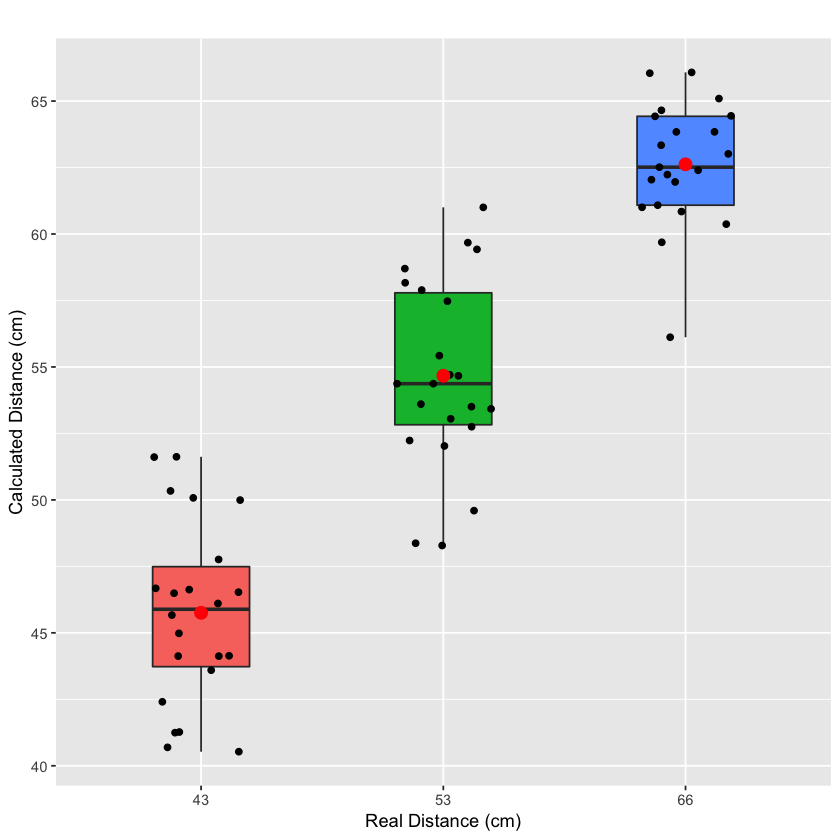

In [6]:
p <- ggplot(exp_2_data, aes(x=as.factor(floor(real_distance/10)), y=viewDistance/10,fill=as.factor(real_distance/10)))

p + geom_boxplot(width=0.4) + geom_jitter(width = 0.2) +
  stat_summary(fun.y=mean, geom="point", shape=20, size=5, color="red", fill="red") +
  labs(title="", x="Real Distance (cm)", y="Calculated Distance (cm)") +
  theme(legend.position="none") +
  scale_y_continuous(breaks=c(40,45,50,55,60,65))

#### Table 1: viewing distance in 6 conditions

In [7]:
#mean
d_means <- aggregate(viewDistance~as.factor(real_distance)+screen, exp_2_data, mean)
d_means

#absolute error
d_err <- aggregate(abs(error)~as.factor(real_distance)+screen, exp_2_data, mean) #absolute errors
d_err

#standard deviation (not in manuscript)
d_sd <- aggregate(viewDistance~as.factor(real_distance)+screen, exp_2_data, sd)
d_sd

as.factor(real_distance),screen,viewDistance
<fct>,<dbl>,<dbl>
431.8,13,471.5991
533.4,13,556.8900
660.4,13,636.5450
431.8,23,443.4900
533.4,23,536.4864
660.4,23,616.8155


as.factor(real_distance),screen,abs(error)
<fct>,<dbl>,<dbl>
431.8,13,45.72818
533.4,13,35.28091
660.4,13,23.95100
431.8,23,23.50091
533.4,23,27.43909
660.4,23,43.58455


as.factor(real_distance),screen,viewDistance
<fct>,<dbl>,<dbl>
431.8,13,39.16093
533.4,13,42.47342
660.4,13,21.18851
431.8,23,23.28260
533.4,23,24.77794
660.4,23,22.01237


#### Horizontal Blind Spot Location Estimation

In [8]:
#calcualte estimated blind spots in exp. 2, given alpha = 13.5 degrees
exp_2_data$estimated_blind_spot <- rad2deg(atan(0.24*exp_2_data$viewDistance/exp_2_data$real_distance))

#combine data from exp. 1 and exp. 2
estimated_blind_spot <- c(exp_2_data$estimated_blind_spot, exp_1_data$Blind_Spot_degree)
estimated_blind_spot <-data.frame(estimated_blind_spot)

#### Estimation summary

In [9]:
summary(estimated_blind_spot)

#sd
sd(estimated_blind_spot$estimated_blind_spot,na.rm=TRUE)

 estimated_blind_spot
 Min.   :11.53       
 1st Qu.:12.91       
 Median :13.51       
 Mean   :13.59       
 3rd Qu.:14.16       
 Max.   :16.01       
 NA's   :1           

[1] 0.9583704

#### Draw Figure 4

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

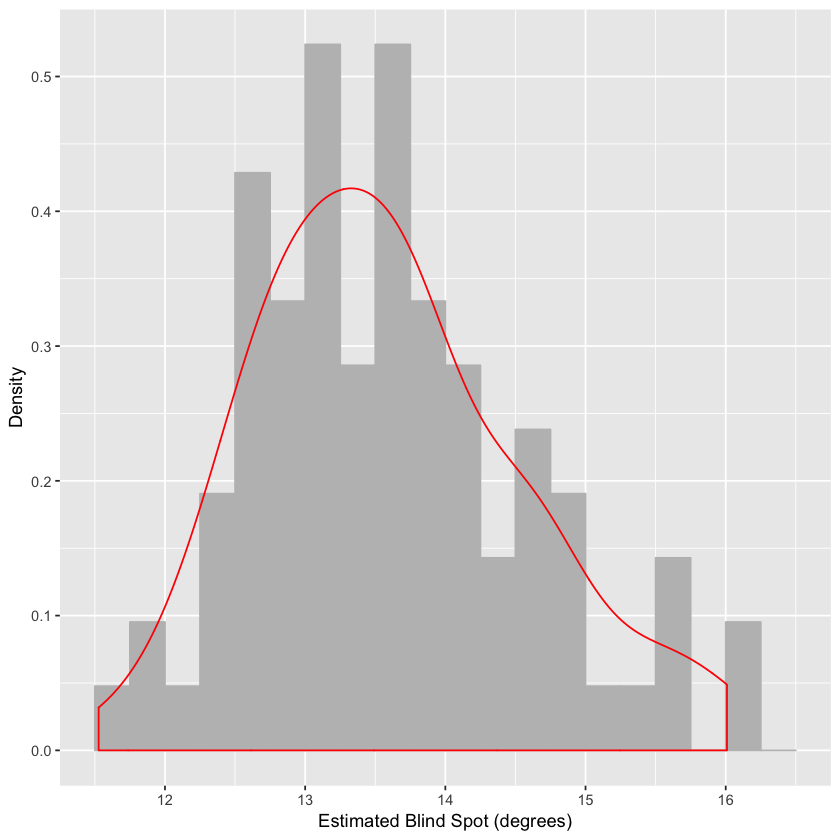

In [10]:

ggplot(data=estimated_blind_spot, aes(estimated_blind_spot)) + 
  geom_histogram(aes(y =..density..), breaks=seq(11.5, 16.5, 0.25), col="grey", fill="grey") + 
  geom_density(col=2) + 
  labs(x="Estimated Blind Spot (degrees)", y="Density")

